In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [102]:
original_df= pd.read_csv('online_retail_II.csv')
df= original_df.copy()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Data Cleaning

In [103]:
df.shape

(1067371, 8)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [105]:
df['Price'].describe()

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
25%      1.250000e+00
50%      2.100000e+00
75%      4.150000e+00
max      3.897000e+04
Name: Price, dtype: float64

In [106]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [107]:
df.dropna(subset=['Customer ID'], inplace=True)
df.shape

(824364, 8)

In [108]:
for col in df.columns:
    print(f"-------Value counts for column: {col}------\n")
    print(df[col].value_counts())

-------Value counts for column: Invoice------

Invoice
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
502263       1
C514528      1
546102       1
C546106      1
C494927      1
Name: count, Length: 44876, dtype: int64
-------Value counts for column: StockCode------

StockCode
85123A    5322
22423     3777
85099B    3446
84879     2794
20725     2755
          ... 
21766        1
37477C       1
20939        1
72751C       1
90011E       1
Name: count, Length: 4646, dtype: int64
-------Value counts for column: Description------

Description
WHITE HANGING HEART T-LIGHT HOLDER    5315
REGENCY CAKESTAND 3 TIER              3777
ASSORTED COLOUR BIRD ORNAMENT         2794
JUMBO BAG RED RETROSPOT               2776
LUNCH BAG  BLACK SKULL.               2161
                                      ... 
SET 12 COLOURING PENCILS DOILEY          1
SPOTTY COCKEREL DOORSTOP                 1
S/3 ROSE GARDEN SCENT SQU CANDLE         1
RUSSIAN FOLKART STACKING 

In [109]:
df['Invoice']= df['Invoice'].astype(str)
df['Invoice']= df['Invoice'].replace(r'[a-zA-Z]+', '', regex=True)
df['Invoice'] = df['Invoice'].astype(int)
df['Invoice'].value_counts()

Invoice
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
502263      1
514528      1
546102      1
546106      1
494927      1
Name: count, Length: 44876, dtype: int64

In [110]:
df = df[df['Quantity'] > 0]
df['Quantity'].value_counts()

Quantity
1        153683
12       119842
2        117920
6         80249
4         62209
          ...  
174           1
2304          1
985           1
327           1
80995         1
Name: count, Length: 438, dtype: int64

In [111]:
df.dtypes

Invoice          int32
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [112]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID']= df['Customer ID'].astype(int)

In [113]:
df.dtypes

Invoice                 int32
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int32
Country                object
dtype: object

In [114]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [115]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [116]:
df['total_price']= df['quantity'] * df['price']
df.drop('description', axis=1, inplace=True)
df.to_csv('cleaned_df.csv', index=False)
df

,invoice,stockcode,quantity,invoicedate,price,customer_id,country,total_price
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680,France,14.85


# RFM Feature Engineering

In [117]:
snapshot_date = df['invoicedate'].max() + pd.Timedelta(days=1)

In [118]:
rfm_data = df.groupby('customer_id').agg({
    'invoicedate': lambda date: (snapshot_date - date.max()).days,
    'invoice': 'nunique',
    'total_price': 'sum'
})

rfm_data.rename(columns={'invoicedate': 'recency',
                         'invoice': 'frequency',
                         'total_price': 'monetary'}, inplace=True)

In [119]:
rfm_data

,recency,frequency,monetary
customer_id,,,
12346,326,12,77556.46
12347,2,8,5633.32
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40
...,...,...,...
18283,4,22,2736.65
18284,432,1,461.68
18285,661,1,427.00


# EDA

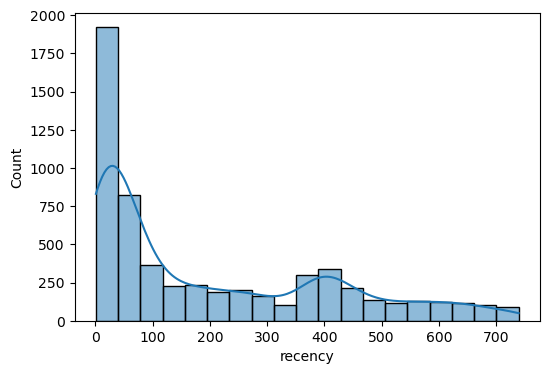

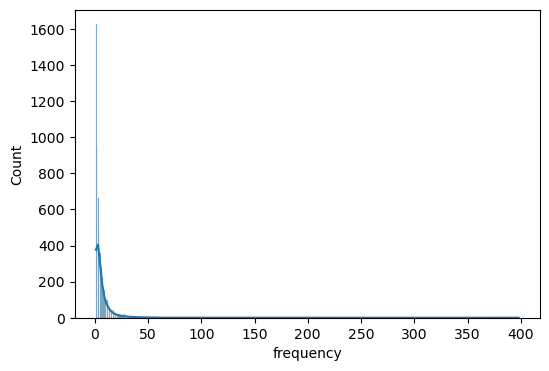

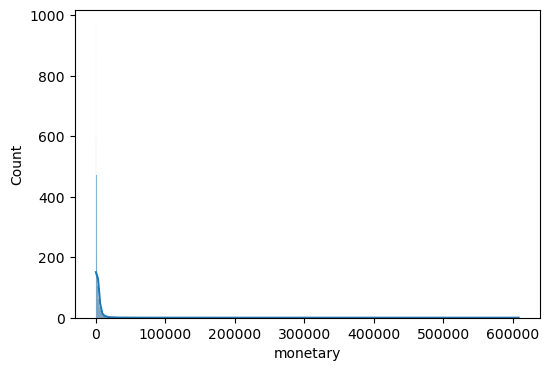

In [120]:
rfm_cols= ['recency', 'frequency', 'monetary']
for col in rfm_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(x= rfm_data[col], kde=True)

In [121]:
log_transformation= np.log1p(rfm_data)
log_transformation

,recency,frequency,monetary
customer_id,,,
12346,5.789960,2.564949,11.258774
12347,1.098612,2.197225,8.636632
12348,4.330733,1.791759,7.611051
12349,2.995732,1.609438,8.396085
12350,5.739793,0.693147,5.815324
...,...,...,...
18283,1.609438,3.135494,7.914855
18284,6.070738,0.693147,6.137036
18285,6.495266,0.693147,6.059123


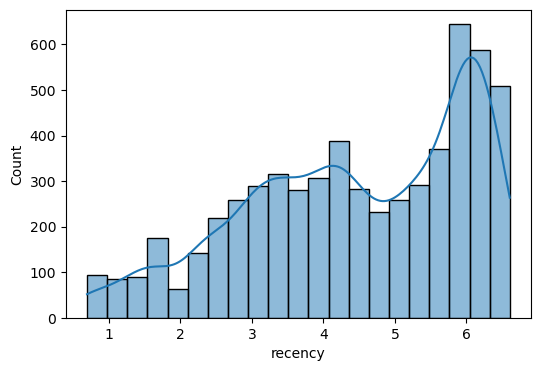

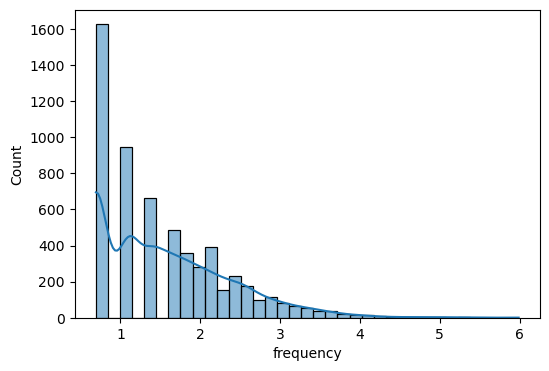

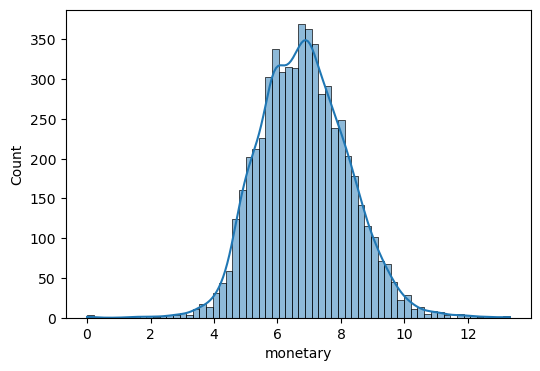

In [122]:
for col in log_transformation.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(x= log_transformation[col], kde=True)

In [123]:
merged_df= pd.merge(df, log_transformation, on='customer_id')
merged_df

,invoice,stockcode,quantity,invoicedate,price,customer_id,country,total_price,recency,frequency,monetary
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,5.068904,2.197225,7.797406
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,5.068904,2.197225,7.797406
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,5.068904,2.197225,7.797406
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,5.068904,2.197225,7.797406
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,5.068904,2.197225,7.797406
...,...,...,...,...,...,...,...,...,...,...,...
805615,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0.693147,1.609438,6.781977
805616,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0.693147,1.609438,6.781977
805617,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0.693147,1.609438,6.781977
805618,581587,22138,3,2011-12-09 12:50:00,4.95,12680,France,14.85,0.693147,1.609438,6.781977


<Axes: >

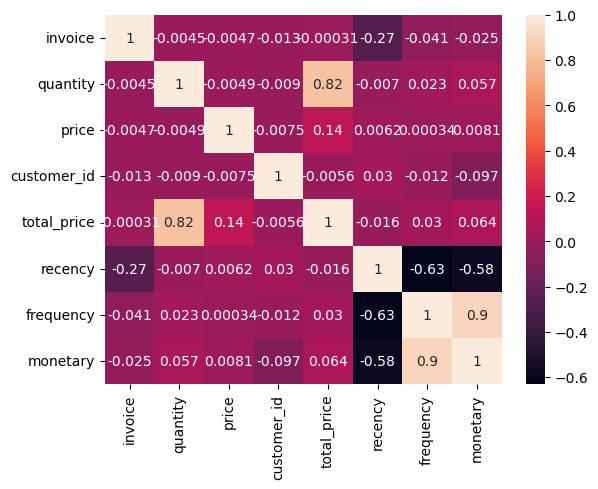

In [124]:
sns.heatmap(merged_df.corr(numeric_only= True), annot=True)

# Customer Segmentation with K-Means Clustering

In [125]:
scaler= StandardScaler()
df_scaled= scaler.fit_transform(log_transformation)
df_scaled

array([[ 0.85632068,  1.25493788,  3.17038719],
       [-2.15192393,  0.80063464,  1.2919986 ],
       [-0.07938295,  0.29970536,  0.55731714],
       ...,
       [ 1.3085854 , -1.05756818, -0.55441609],
       [ 1.09976495, -0.5566389 ,  0.24003565],
       [-0.42984452,  0.65512034,  1.07880297]])

In [126]:
inertia= []
k_range= range(1,11)

for k in k_range:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

inertia

[17643.0,
 8614.946158654508,
 6382.423057117466,
 4949.228804709554,
 4129.989857438568,
 3586.990413321882,
 3220.8055188684775,
 2920.367401845461,
 2688.324606404995,
 2498.7204000535157]

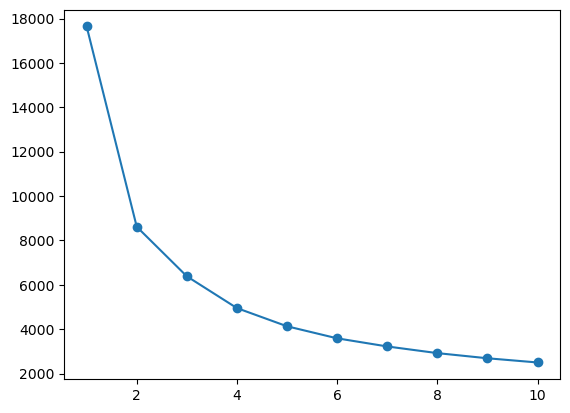

In [127]:
plt.plot(k_range, inertia, marker='o')

In [128]:
kmeans_final= KMeans(n_clusters=4)
kmeans_final

KMeans(n_clusters=4)

In [129]:
cluster_labels= kmeans_final.fit_predict(df_scaled)
cluster_labels

array([1, 1, 0, ..., 3, 0, 1])

In [130]:
rfm_data['cluster']= cluster_labels
rfm_data['cluster'].value_counts()

cluster
3    1972
0    1467
2    1252
1    1190
Name: count, dtype: int64

In [131]:
# Calculate the mean RFM values and count for each cluster
cluster_summary = rfm_data.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'cluster': 'size'  # Get the number of customers in each cluster
}).rename(columns={'cluster': 'Size'})


cluster_summary.sort_values(by='monetary', ascending=False, inplace=True)


cluster_summary

,recency,frequency,monetary,Size
cluster,,,,
1,27.505042,19.329412,11001.208703,1190
0,228.783913,5.075665,1995.093748,1467
2,28.376997,3.045527,868.233196,1252
3,395.987830,1.376268,323.610716,1972


In [132]:
label_map = {
    0: 'Champions',
    1: 'Lost Customers',
    2: 'At-Risk Loyalists',
    3: 'New/Promising'
}

rfm_data['Segment'] = rfm_data['cluster'].map(label_map)

rfm_data.to_csv('rfm_data.csv')
rfm_data

,recency,frequency,monetary,cluster,Segment
customer_id,,,,,
12346,326,12,77556.46,1,Lost Customers
12347,2,8,5633.32,1,Lost Customers
12348,75,5,2019.40,0,Champions
12349,19,4,4428.69,2,At-Risk Loyalists
12350,310,1,334.40,3,New/Promising
...,...,...,...,...,...
18283,4,22,2736.65,1,Lost Customers
18284,432,1,461.68,3,New/Promising
18285,661,1,427.00,3,New/Promising


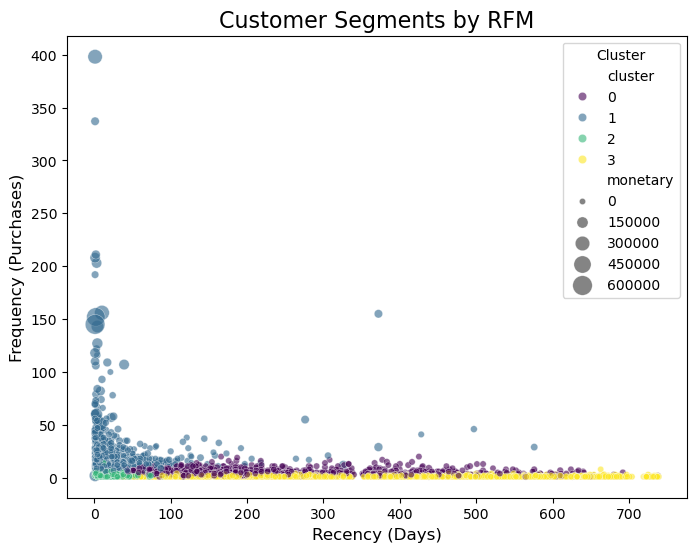

In [133]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=rfm_data,
    x='recency',
    y='frequency',
    hue='cluster',      
    size='monetary',    
    sizes=(20, 200),    
    palette='viridis',  
    alpha=0.6           
)

plt.title('Customer Segments by RFM', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Frequency (Purchases)', fontsize=12)
plt.legend(title='Cluster')
plt.show()